# Thyroid Classification Analysis

# Imports

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, PowerTransformer, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.dummy import DummyClassifier

# Functions

In [6]:
def null_duplicate_check(df):
  print(f"Null Values Amount: {df.isna().sum()}")
  print(f"Duplicate Values Amount: {df.duplicated().sum()}")
  
def check_class_imbalance(target):
  
  target = np.array(target)
  
  unique, counts = np.unique(target, return_counts=True)
  
  plt.figure(figsize=(10, 8))
  plt.pie(counts, labels=unique, startangle=140, autopct="%1.1f%%")
  plt.title("Target Class Breakdown")
  plt.show()
  
  plt.figure(figsize=(10, 8))
  sns.countplot(x=target)
  plt.title("Target Class Breakdown")
  plt.xlabel("Classes")
  plt.ylabel("Counts")
  plt.show()

def create_column_transformer(numeric_features, categorical_features):
  
  numeric_cols, categorical_cols = numeric_features.columns, categorical_features.columns
  
  numeric_transformer = Pipeline(
    steps=[ ("scaler", StandardScaler), ("powertranformer", PowerTransformer())]
  )

# EDA Analysis

In [2]:
df = pd.read_csv("/Users/maukanmir/Downloads/data.csv")
df

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,72,M,Yes,Yes,Yes,Euthyroid,Single nodular goiter-right,Right,Papillary,Uni-Focal,High,T4b,N1b,M1,IVB,Biochemical Incomplete,Yes
379,81,M,Yes,No,Yes,Euthyroid,Multinodular goiter,Extensive,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
380,72,M,Yes,Yes,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
381,61,M,Yes,Yes,Yes,Clinical Hyperthyroidism,Multinodular goiter,Extensive,Hurthel cell,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,Yes


# Check for Nulls and Dupes

In [4]:
null_duplicate_check(df)

Null Values Amount: Age                     0
Gender                  0
Smoking                 0
Hx Smoking              0
Hx Radiothreapy         0
Thyroid Function        0
Physical Examination    0
Adenopathy              0
Pathology               0
Focality                0
Risk                    0
T                       0
N                       0
M                       0
Stage                   0
Response                0
Recurred                0
dtype: int64
Duplicate Values Amount: 19


In [5]:
df.drop_duplicates(inplace=True)

# Check for class imbalance

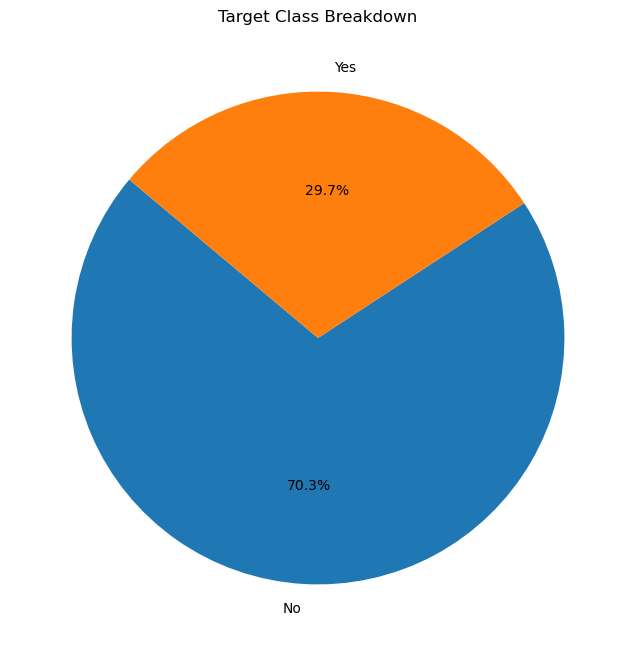

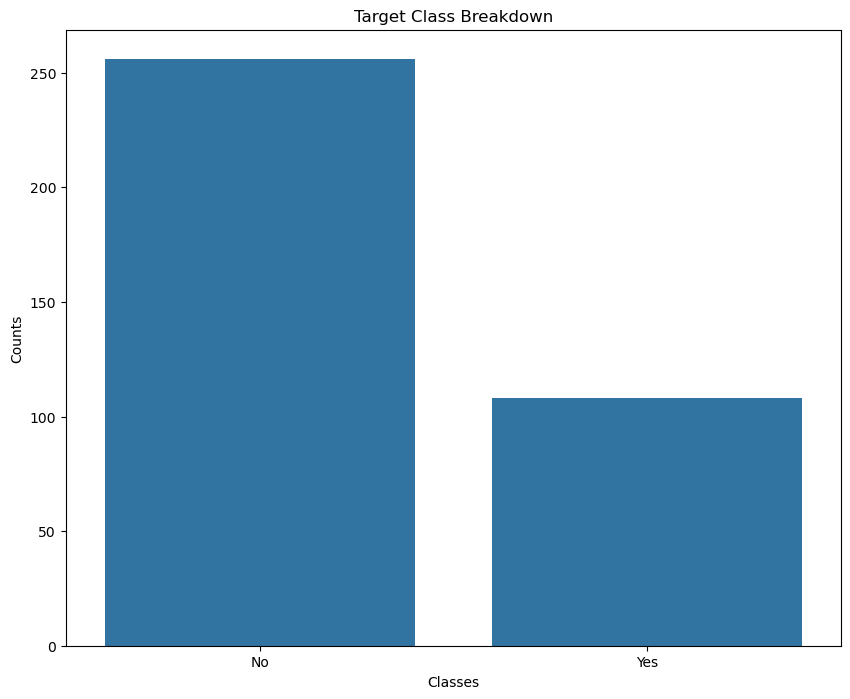

In [7]:
check_class_imbalance(df["Recurred"])

# Classes are imbalanced which means we will have to use some sampling techniques in order to address the imabalance

In [9]:
df.dtypes

Age                      int64
Gender                  object
Smoking                 object
Hx Smoking              object
Hx Radiothreapy         object
Thyroid Function        object
Physical Examination    object
Adenopathy              object
Pathology               object
Focality                object
Risk                    object
T                       object
N                       object
M                       object
Stage                   object
Response                object
Recurred                object
dtype: object

# All but one column is an integer value which means, we will have to do some preprocessing in order to format the data on our models.

In [19]:
categorical_features, numeric_features = df.select_dtypes(include=["object"]).drop("Recurred", axis=1), df.select_dtypes(include="int64")

# We have ordinal columns and we also have catergorical columns, we need to address this in our processing stages. The only issue is that I don't know which columns are categorical and ordinal. We will have to guess.

In [ ]:
ordinal_features = categorical_features[["Stage", "Response", "Risk"]]

# Create Column Transformer

In [20]:
df["T"].value_counts(
)

T2     138
T3a     96
T1a     46
T1b     40
T4a     20
T3b     16
T4b      8
Name: T, dtype: int64